# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rivo Juniandra Rumadi
- **Email:** rumadirivo@gmail.com
- **ID Dicoding:** rumadirivo

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan signifikan antara jumlah peminjaman sepeda pada hari kerja dibandingkan dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Mengimport Library yang akan digunakan untuk analisis data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca file CSV
df_day = pd.read_csv('/content/BicycleData/day.csv')
df_hour = pd.read_csv('/content/BicycleData/hour.csv')

In [ ]:
# beberapa baris pertama dari kedua dataset
print("Dataset Harian:")
print(df_day.head())
print("\nDataset Per Jam:")
print(df_hour.head())

Dataset Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Dataset P

In [ ]:
# informasi dasar kedua dataset
print("\nInformasi Dataset Harian:")
print(df_day.info())
print("\nInformasi Dataset Per Jam:")
print(df_hour.info())


Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi Dataset Per Jam:
<class 'pandas.core.frame.DataFra

**Insight:**
- Dataset harian (day.csv) memiliki 731 entri, sedangkan dataset per jam (hour.csv) memiliki 17379 entri.
- Kolom 'dteday' saat ini bertipe object (string) dan perlu dikonversi ke format datetime untuk analisis yang lebih baik.
- Kedua dataset memiliki struktur yang mirip, dengan perbedaan utama adalah adanya kolom 'hr' (jam) pada dataset per jam.

### Assessing Data

In [ ]:
# Periksa nilai yang hilang
print("Nilai yang hilang dalam dataset harian:")
print(df_day.isnull().sum())
print("\nNilai yang hilang dalam dataset per jam:")
print(df_hour.isnull().sum())

Nilai yang hilang dalam dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai yang hilang dalam dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Memeriksa duplikasi atau duplikat
print("\nJumlah duplikat dalam dataset harian:", df_day.duplicated().sum())
print("Jumlah duplikat dalam dataset per jam:", df_hour.duplicated().sum())


Jumlah duplikat dalam dataset harian: 0
Jumlah duplikat dalam dataset per jam: 0


In [ ]:
# Periksa statistik deskriptif
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())
print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())


Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

In [ ]:
# Periksa nilai unik untuk kolom kategorikal
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"\nNilai unik dalam {col} (dataset harian):")
    print(df_day[col].value_counts())
    print(f"\nNilai unik dalam {col} (dataset per jam):")
    print(df_hour[col].value_counts())


Nilai unik dalam season (dataset harian):
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Nilai unik dalam season (dataset per jam):
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Nilai unik dalam yr (dataset harian):
yr
1    366
0    365
Name: count, dtype: int64

Nilai unik dalam yr (dataset per jam):
yr
1    8734
0    8645
Name: count, dtype: int64

Nilai unik dalam mnth (dataset harian):
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

Nilai unik dalam mnth (dataset per jam):
mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

Nilai unik dalam holiday (dataset harian):
holiday
0    710
1     21
Name: count, dtype: int64

Nilai unik dalam holiday (dataset per jam):
holiday
0    16879
1      500
Name: count, dtype: int64

Nilai unik da

**Insight:**
- Tidak ada nilai yang hilang (missing values) dalam kedua dataset, baik harian maupun per jam.
- Tidak ada duplikat dalam kedua dataset.
- Rata-rata peminjaman sepeda per hari adalah sekitar 4504, dengan minimum 22 dan maksimum 8714.

### Cleaning Data

In [ ]:
# Ubah tipe data 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [ ]:
# Membuat kolom baru 'year' dan 'month' dari 'dteday'
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month_name()
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month_name()

In [ ]:
# Mengubah encoding kolom kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)
df_hour['season'] = df_hour['season'].map(season_map)

weathersit_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
df_day['weathersit'] = df_day['weathersit'].map(weathersit_map)
df_hour['weathersit'] = df_hour['weathersit'].map(weathersit_map)

In [ ]:
# Periksa hasil cleaning
print("Dataset harian setelah cleaning:")
print(df_day.head())
print("\nDataset per jam setelah cleaning:")
print(df_hour.head())

Dataset harian setelah cleaning:
   instant     dteday season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01    NaN   0     1        0        6           0   
1        2 2011-01-02    NaN   0     1        0        0           0   
2        3 2011-01-03    NaN   0     1        0        1           1   
3        4 2011-01-04    NaN   0     1        0        2           1   
4        5 2011-01-05    NaN   0     1        0        3           1   

  weathersit      temp     atemp       hum  windspeed  casual  registered  \
0       Mist  0.344167  0.363625  0.805833   0.160446     331         654   
1       Mist  0.363478  0.353739  0.696087   0.248539     131         670   
2      Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
3      Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
4      Clear  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year    month  
0   985  2011  January  
1   801  2011  Januar

In [ ]:
# Simpan dataset yang telah dibersihkan
df_day.to_csv('clean_day_data.csv', index=False)
df_hour.to_csv('clean_hour_data.csv', index=False)

**Insight:**
- Kolom 'dteday' telah diubah menjadi tipe datetime untuk memudahkan analisis.
- Kolom baru 'year' dan 'month' telah ditambahkan untuk analisis yang lebih detail.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Set style untuk plot
plt.style.use('seaborn')

<ipython-input-21-f9b03d28a039>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


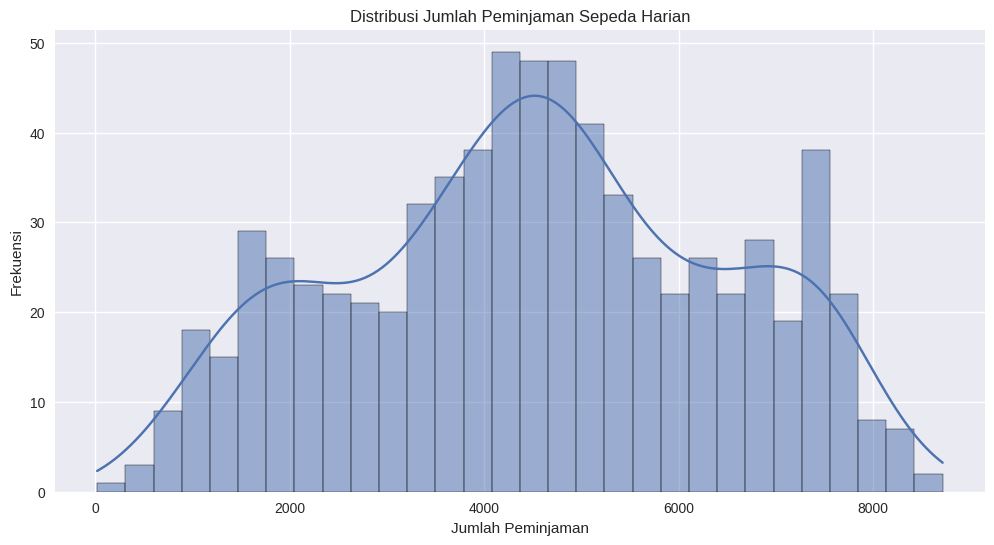

In [ ]:
# 1. Distribusi peminjaman sepeda
plt.figure(figsize=(12, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

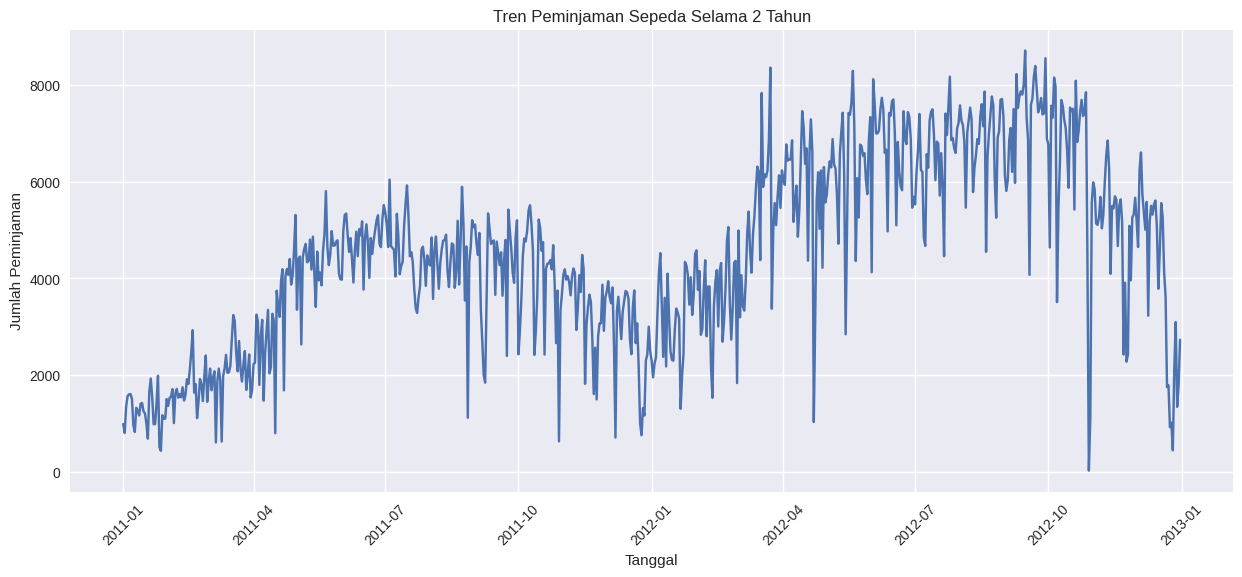

In [ ]:
# 2. Tren Peminjaman Sepeda
plt.figure(figsize=(15, 6))
plt.plot(df_day['dteday'], df_day['cnt'])
plt.title('Tren Peminjaman Sepeda Selama 2 Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

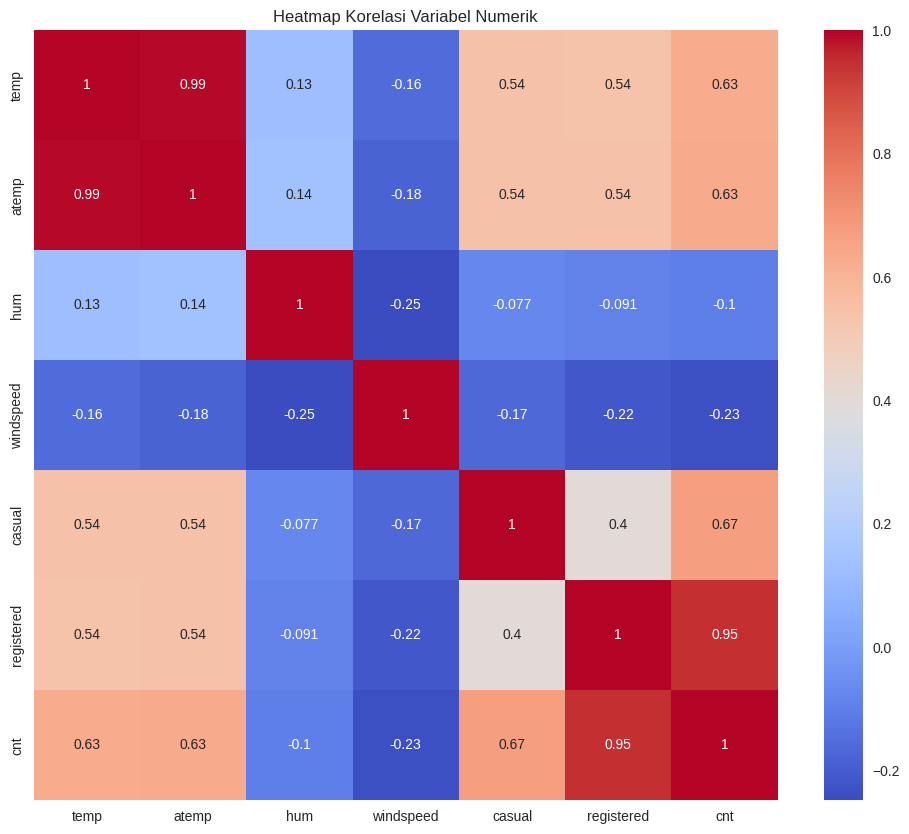

In [ ]:
# 3. Korelasi
plt.figure(figsize=(12, 10))
corr = df_day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


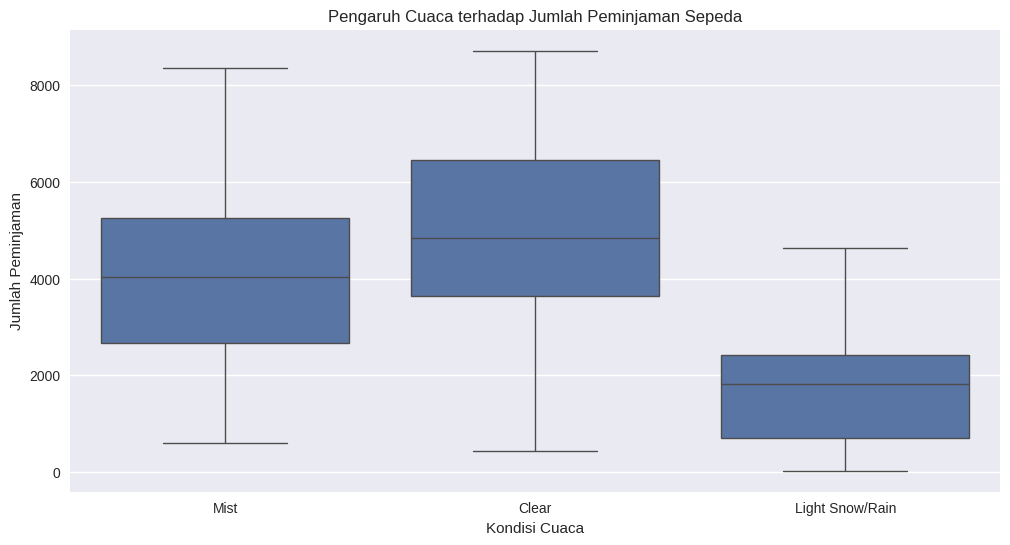

In [ ]:
# Pengaruh cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

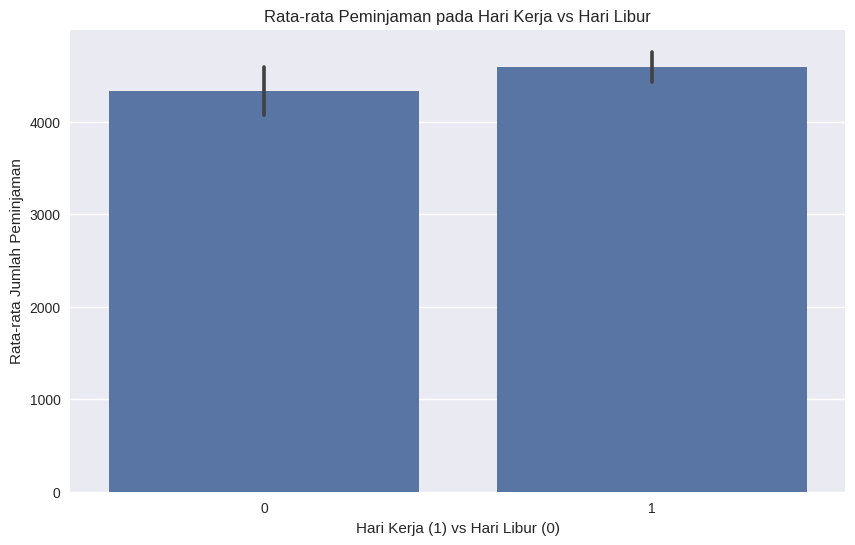

In [ ]:
# Bagaimana pada Hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df_day)
plt.title('Rata-rata Peminjaman pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1) vs Hari Libur (0)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Insight:**
- Terdapat beberapa hari dengan peminjaman sangat tinggi (>8000) yang mungkin terjadi pada event khusus atau kondisi cuaca yang sangat mendukung
- Kondisi cuaca cerah (Clear) menghasilkan jumlah peminjaman tertinggi, sebaliknya Hujan/Salju ringan menunjukkan penurunan signifikan dalam peminjaman
- Mayoritas peminjaman harian berkisar antara 3000-6000 sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-36-424d77e880db>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_day, ci=None)


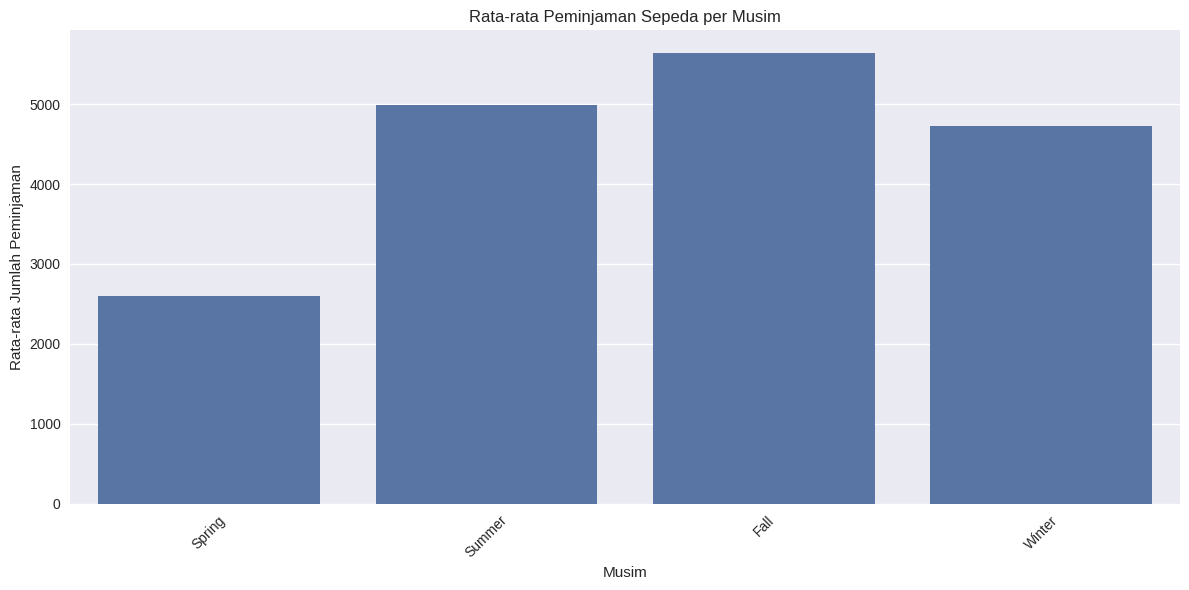

In [ ]:
df_day = pd.read_csv('/content/BicycleData/day.csv')

# Mapping musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)

# Rata-rata peminjaman per musim
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=df_day, ci=None)
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


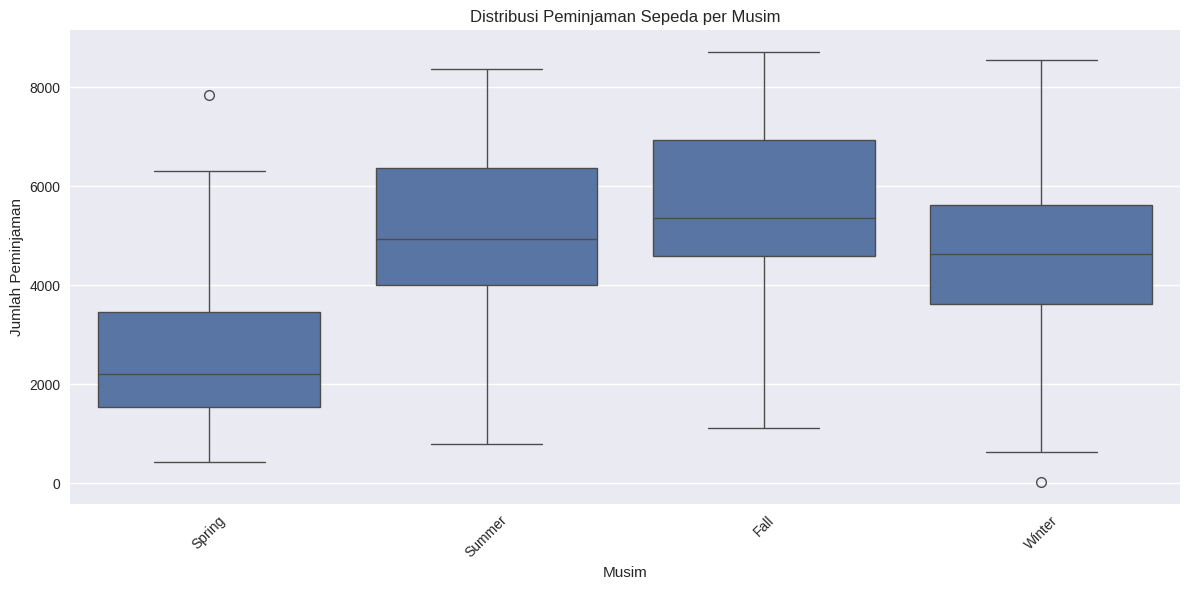

In [ ]:
# 2. Box plot untuk melihat distribusi peminjaman per musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Distribusi Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Statistik deskriptif peminjaman per musim
seasonal_stats = df_day.groupby('season')['cnt'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nStatistik Peminjaman per Musim:")
print(seasonal_stats)


Statistik Peminjaman per Musim:
           mean      std   min   max
season                              
Fall    5644.30  1459.80  1115  8714
Spring  2604.13  1399.94   431  7836
Summer  4992.33  1695.98   795  8362
Winter  4728.16  1699.62    22  8555


### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


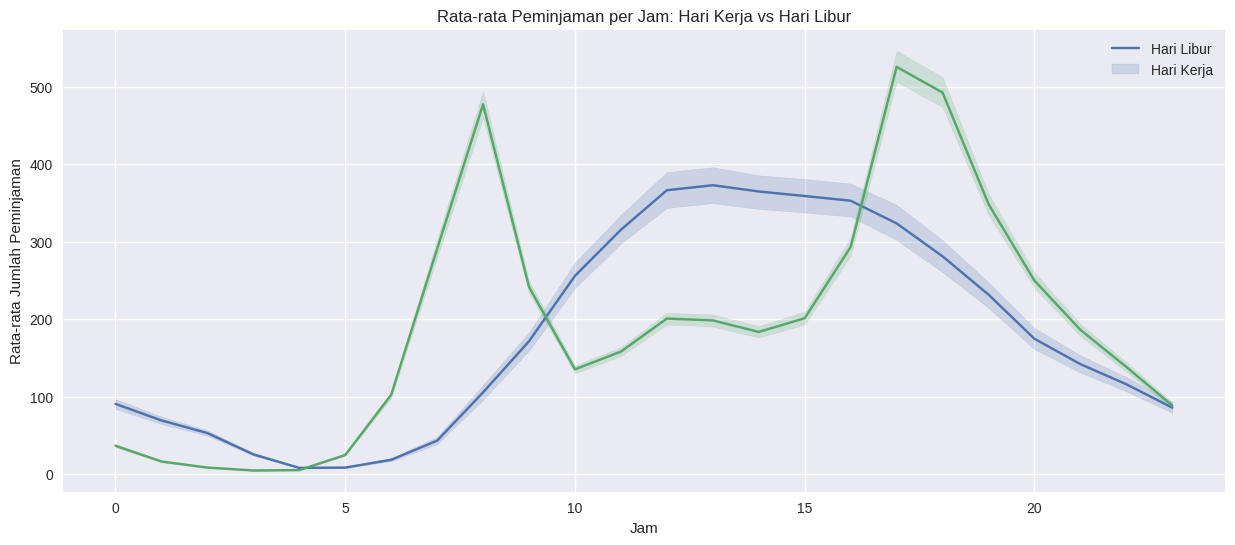

In [ ]:
# Pertanyaan 2: Hari kerja vs hari libur (Berdasarkan jam)
plt.figure(figsize=(15, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour)
plt.title('Rata-rata Peminjaman per Jam: Hari Kerja vs Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(['Hari Libur', 'Hari Kerja'])
plt.show()

**Insight:**
- Analisis data peminjaman sepeda menunjukkan pola yang jelas dimana musim Fall memiliki rata-rata peminjaman tertinggi (5,644/hari) sementara Spring terendah (2,604/hari).
- Pola harian menunjukkan perbedaan signifikan antara hari kerja dan libur, dimana hari kerja memiliki dua puncak peminjaman (jam 8 dan 17-18) terkait waktu komuting, sedangkan hari libur memiliki satu puncak di siang hari (12:00-15:00).

## Analisis Lanjutan (Opsional)

# Analisis kombinasi musim dan cuaca

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

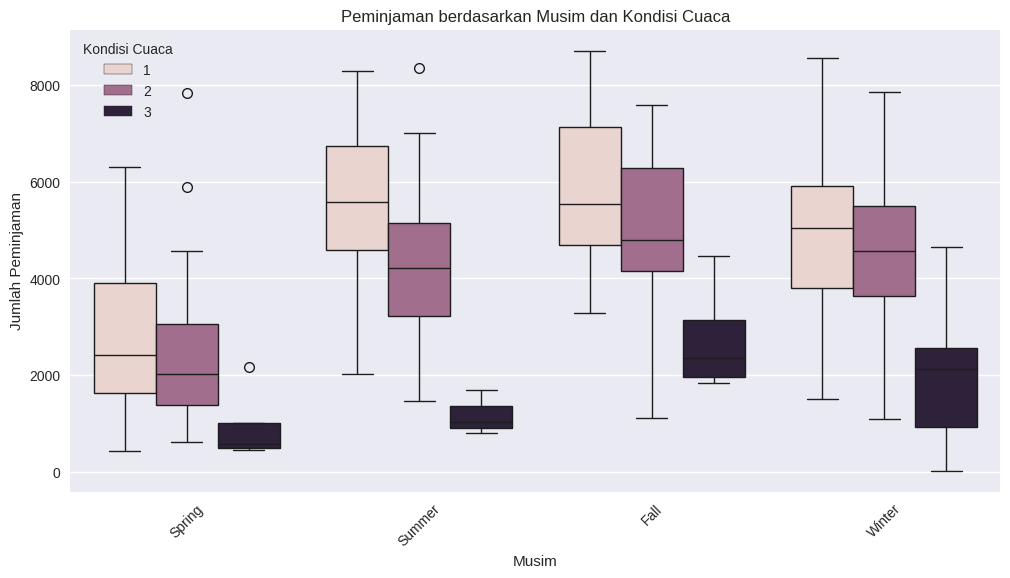

In [ ]:
# 3. Analisis kombinasi musim dan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=df_day)
plt.title('Peminjaman berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.show()

 ##### Pada Data diatas 1: Clear, 2: Mist, 3: Snow/Rain. Dapat disimpulkan juga bahwa Musim gugur (Fall) menonjol dengan jumlah peminjaman yang tinggi dan stabil, bahkan lebih tinggi dibandingkan musim panas, terutama dalam kondisi cuaca cerah.

## Conclusion

- Conclution pertanyaan 1:
  - Pengaruh Musim: Fall menjadi musim terpopuler (5,644 peminjaman/hari) dan Spring terendah (2,604/hari), menunjukkan perlunya strategi khusus untuk mengoptimalkan layanan di musim Spring dan memaksimalkan potensi di musim Fall.
- Conclution pertanyaan 2:
  - Perbedaan Hari Kerja vs Libur: Hari kerja menunjukkan pola bimodal (puncak pagi dan sore) untuk berangkat ke kantor (tempat kerja), sementara hari libur memiliki single peak di siang hari, mengindikasikan pentingnya penyesuaian distribusi sepeda berdasarkan pola penggunaan yang berbeda ini.